# Mammalian Sleep Patterns

This tutorial is intended to give you a brief overview of how to analyze data with krangl and lets-plot package. For further information see
* https://github.com/holgerbrandl/krangl
* https://github.com/JetBrains/lets-plot-kotlin

We learn how to quickly create a variety of different plots and have the necessary nderstand how to adapt plots to ourpecific needs.

In [6]:
// clean up ivy cache
// java.io.File("${System.getProperty("user.home")}/.ivy2/cache/com.github.holgerbrandl/krangl/").deleteRecursively()

Your first step should be to install and load `krangl` and `letsplot`.

In [7]:
// @file:Repository("*mavenLocal")
@file:DependsOn("com.github.holgerbrandl:krangl:0.17")


We also add lets-plot (using the legacy style syntax with `%use`)

In [8]:
%use lets-plot

In contrast to R and python we can use versioned dependencies here, which keeps our analysis reproducible even if the underlying libraries evolve.

## The lets-plot ggplot syntax

`letsplot` aoppts the API of https://ggplot2.tidyverse.org/.
The ggplot syntax is used to build a plot layer by layer. Usually, the following steps are involved

* Defining the data to be used in the plot with ggplot(«data.frame»)
* Specifing the visual representation of the data with geoms, i.e. geom_point() or geom_line()
* Specifing the features or aesthetics to represent the values in the plot with aes()
* Optionally modifying scales, labels or adding additional layers

Note: The underlying data is by default the same for all layers.

**Important note: In this tutorial data is always considered to be shaped as data-frame. However, `letsplot` also allows to visualize data shaped differently.**



# Data: Mammals Sleep

The `sleepData` (mammals sleep) data set contains the sleep times and weights for a set of mammals. This data set contains 83 rows and 11 variables.

The dataset ships with `krangl` as an example dataset, so there is no need to download it from elsewhere.

See [here](https://ggplot2.tidyverse.org/reference/msleep.html) for a reference.

In [9]:
sleepData

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,null,null,11.9,null,50.0
Owl monkey,Aotus,omni,Primates,null,17.0,1.8,null,7.0,0.0155,0.48
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,null,9.6,null,1.35
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333333,9.1,2.9E-4,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666666667,20.0,0.423,600.0
Three-toed sloth,Bradypus,herbi,Pilosa,null,14.4,2.2,0.766666667,9.6,null,3.85


Let's also get an idea about the types of the indivudal attributes/columns

In [10]:
sleepData.schema()

Name,Type,Values,name,[Str],"Cheetah, Owl monkey, Mountain beaver, Greater short-tailed shrew, Cow, Three-toed sloth, Northern fu...",genus,[Str],"Acinonyx, Aotus, Aplodontia, Blarina, Bos, Bradypus, Callorhinus, Calomys, Canis, Capreolus, Capri, ...",vore,[Str],"carni, omni, herbi, omni, herbi, herbi, carni, , carni, herbi, herbi, herbi, omni, herbi, omni, ...",order,[Str],"Carnivora, Primates, Rodentia, Soricomorpha, Artiodactyla, Pilosa, Carnivora, Rodentia, Carnivora, A...",conservation,[Str],"lc, , nt, lc, domesticated, , vu, , domesticated, lc, lc, domesticated, lc, domesticated...",sleep_total,[Dbl],"12.1, 17, 14.4, 14.9, 4, 14.4, 8.7, 7, 10.1, 3, 5.3, 9.4, 10, 12.5, 10.3, 8.3, 9.1, 17.4, 5.3, 18, 3...",sleep_rem,[Dbl],", 1.8, 2.4, 2.3, 0.7, 2.2, 1.4, , 2.9, , 0.6, 0.8, 0.7, 1.5, 2.2, 2, 1.4, 3.1, 0.5, 4.9,...",sleep_cycle,[Dbl],", , , 0.133, 0.667, 0.767, 0.383, , 0.333, , , 0.217, , 0.117, , <NA...",awake,[Dbl],"11.9, 7, 9.6, 9.1, 20, 9.6, 15.3, 17, 13.9, 21, 18.7, 14.6, 14, 11.5, 13.7, 15.7, 14.9, 6.6, 18.7, 6...",brainwt,[Dbl],", 0.015, , 0, 0.423, , , , 0.07, 0.098, 0.115, 0.005, , 0.006, 0.001, 0.007,...",bodywt,[Dbl],"50, 0.48, 1.35, 0.019, 600, 3.85, 20.49, 0.045, 14, 14.8, 33.5, 0.728, 4.75, 0.42, 0.06, 1, 0.005, 3..."


We find: In total, 83 speciesare listed with various attributes describing their physique and their sleeping behavior

# Building a first plot

To get started with, we calaculate a new attribute that puts total sleep and rem-sleep into proportion. In other words, we calculate the proportion in which animals are _dreaming_.

In [11]:
var sleepDataExt = sleepData.addColumn("rem_proportion"){it["sleep_rem"]/it["sleep_total"]}

In [12]:
sleepDataExt.select{startsWith("sleep") AND listOf("rem_proportion")}

sleep_total,sleep_rem,sleep_cycle,rem_proportion
12.1,null,null,null
17.0,1.8,null,0.10588235294117647
14.4,2.4,null,0.16666666666666666
14.9,2.3,0.133333333,0.15436241610738252
4.0,0.7,0.666666667,0.175
14.4,2.2,0.766666667,0.1527777777777778


We find: As usual, some records contain missin values, so `rem_proportion` is computed as `NA` (or `null` in kotlinspeak).

In [13]:
sleepDataExt.letsPlot { }

As exepcted nothing happens, because we have not mapped variables to aestethics yet. Let's do so now: 

In [14]:
sleepDataExt.letsPlot {x="sleep_total"; y="rem_proportion" } + geomPoint()

Plots can be assigned to variables for composition and visual exploration:

In [15]:
val myPlot = sleepDataExt.letsPlot {x="sleep_total"; y="rem_proportion" } + geomPoint()
myPlot

And clearly we can export plots e.g. as svg

In [16]:
ggsave(myPlot, "testplot.svg")

D:\projects\misc\krangl\examples\jupyter\lets-plot-images\testplot.svg

# Mapping data attributes to aesthetics

We did it already in when plotting x against y. But concepts extends to other visual attributes as well.

Constant aesthetics are specified outside of mapping. Here, we specify fixed values for size and transparency.

In [17]:
sleepDataExt.letsPlot {x="sleep_total"; y="rem_proportion" }     +  
        geom_point(size=4, alpha=0.3)

Insead of mapping to fixed values, we can also map columns (variables) in our dataset to visual attributes such color on the plot

In [18]:
sleepDataExt
    .letsPlot {x="sleep_total"; y="rem_proportion"; color="vore" } +  
    geomPoint(size=4, alpha=.7)

We find: At first glance there is no striking correlation pattern wrt food preference.

The `alpha` was set to accomdate possible over-plotting, i.e. overlapping points.

Still we don't see much of pattern here, so let's bring in another attribute: We map the average brain size of each species to the point size 

In [19]:
sleepDataExt
    .letsPlot {x="sleep_total"; y="rem_proportion"; color="vore"; size="brainwt" } +  
    geomPoint(size=4, alpha=.7) 


Line_37.jupyter-kts (2:67 - 71) Unresolved reference: size

This does not work, see chapter about `letsplot` limiations.

# Multiple layers

To perform a distribution analysis, a histogram comes to mind. Luckly we can use the same paradigm - mapping of data attribute to aestaetcis here.

In [20]:
sleepDataExt.letsPlot { x="sleep_total"} + geomHistogram(binWidth = 2)

This looks good, but can't easily compare groups while keeping an eye on the raw data. So let's a [boxplot](https://en.wikipedia.org/wiki/Box_plot) instead. 

In [21]:
sleepDataExt.letsPlot { x="vore"; y="sleep_total"} + geomBoxplot()

It's the nature of a boxplot to just display quantiles of distribution. So we lost track of outliers and the overall possible multi-modal shape of the distributions. 

Luckily, we can superimpose a second layer here to shaw raw data.

In [22]:
sleepDataExt.letsPlot { x="vore"; y="sleep_total"} +
    geomBoxplot() + 
    geomPoint()

This looks good, but the points all being aligned horizontally lack beauty, so we randomize their positiion on along x.

In [23]:
sleepDataExt.letsPlot { x="vore"; y="sleep_total"} +
    geomBoxplot() + 
    geomPoint(position=positionJitter(0.3))

We find: Overlaying the boxplot with the raw data payed off right away. First the groups have different sizes and the insects show a bi-modal distribution in total sleep time.

# Conservation status

To better understand our dataset we want to understand how conservation status and food preference relate to each other.

Conservation_status (Source Wikipedia):
* cd = (Conservation Dependent, now part of NT), stable and sizable populations depend on sustained conservation activity. 
* Domesticated 
* en = Endangered (EN): faces a high risk of extinction in the near future. 
* lc = LC (Least Concern) species that have been evaluated and found to be so common that no conservation concern is projected in the foreseeable future. 
* nt = NT (Near Threatened: close to qualifying for listing as Vulnerable but not fully meeting those criteria; slowly declining or fairly small populations but probably no danger of going extinct even without conservation activity in the foreseeable future, or threats suspected to affect taxon in the near future but still avoidable 
* vu =Vulnerable (VU): faces a considerable risk of extinction in the medium term

Let check the overall distribution in our data set

In [24]:
sleepDataExt.letsPlot { x="conservation"} + geomBar()

We find: The majority of the species in our dataset is not being endangered.

Let's spice this up by adding the food preference.

In [25]:
sleepDataExt.letsPlot { x="conservation"; fill="vore"} +
    geomBar()

.. or with attributes being flipped

In [26]:
sleepDataExt.letsPlot { x="vore"; fill="conservation"} +
    geomBar()

We find: Endangered specied seem enriched in carnivore and herbivore. However, there is a large proportion of missing values here, so our finding feels inconclusive.

To also display the same data also in proportional terms, we can simply adjust the style.

In [27]:
sleepDataExt.letsPlot { x="vore"; fill="conservation"} + 
    geomBar(position=Pos.fill)

# Scales

Scales are required to give the plot reader a sense of reference and thus encompass the ideas of both axes and legends on plots.

ggplot2 will usually automatically chose appropriate scales and display legends if necessary.

It is however, very easy to override or modify the default values.

The scale syntax is scale_«attribute»_«optional subspecification»() i.e. `scale_x_continuous()` or `scale_x_discrete()` or `scale_x_log10()`


Although being just 83 records, this set is very rich. Let's analyze the data for possible correlation between physical dimensions and sleep properties.

In [28]:
val corPlot = sleepData.letsPlot { x="bodywt"; y="sleep_total"} + 
    geomPoint()

In [29]:
corPlot + xlab("Body Weight")

We find: It's hard to analyze the data because some outliers. We could either filter them away

In [30]:
sleepData
    .filter{it["bodywt"] lt 2000}
    .letsPlot { x="bodywt"; y="sleep_total"} + 
    geomPoint()

But then we would just study some subset. So as alternative, we can also modulate the scale on the x.

In [31]:
corPlot + xlab("Body Weight") + scaleXLog10()

It's hard to see correlatoin to let's overlay the display with a regression model.

In [32]:
corPlot + 
    xlab("Body Weight") + 
    scaleXLog10() +
    geomSmooth() + 
    ggtitle("Correlation between sleep time and body weight")

Technically, we can always fit a linear trend model here, but 
We find: There is no correlation between sleep time and body weight. But we never know without asking the data. And a negative result can be as informative as a positive finding.

# Limitations

One motivation of the author of this tutorial was to assess the current capabilities of `letsplot`. It has undergone a great and amazing evolution over the last 2 years and provides a great API experience and a wide range of plotting capabilities.

As always there a few shortcomings, that are to some extent speicific bias of the author, personal taste or maybe just areas where the library is still under development.

## No theming

Note: Currently there does not seem to be a way to modify the style of the plot, also known as _theming_. See also https://github.com/JetBrains/lets-plot/issues/221. 

The good news: There is an emerging data-science ecosystem in Kotlin, sow we could use a different library such as [kravis](https://github.com/holgerbrandl/kravis). `kravis` is a wrapper around R/ggplot and so has more comple setup requirements.

In [33]:
@file:DependsOn("com.github.holgerbrandl:kravis:0.8.1")


So let's rebuild the plot with kravis. Note the call the `theme*`

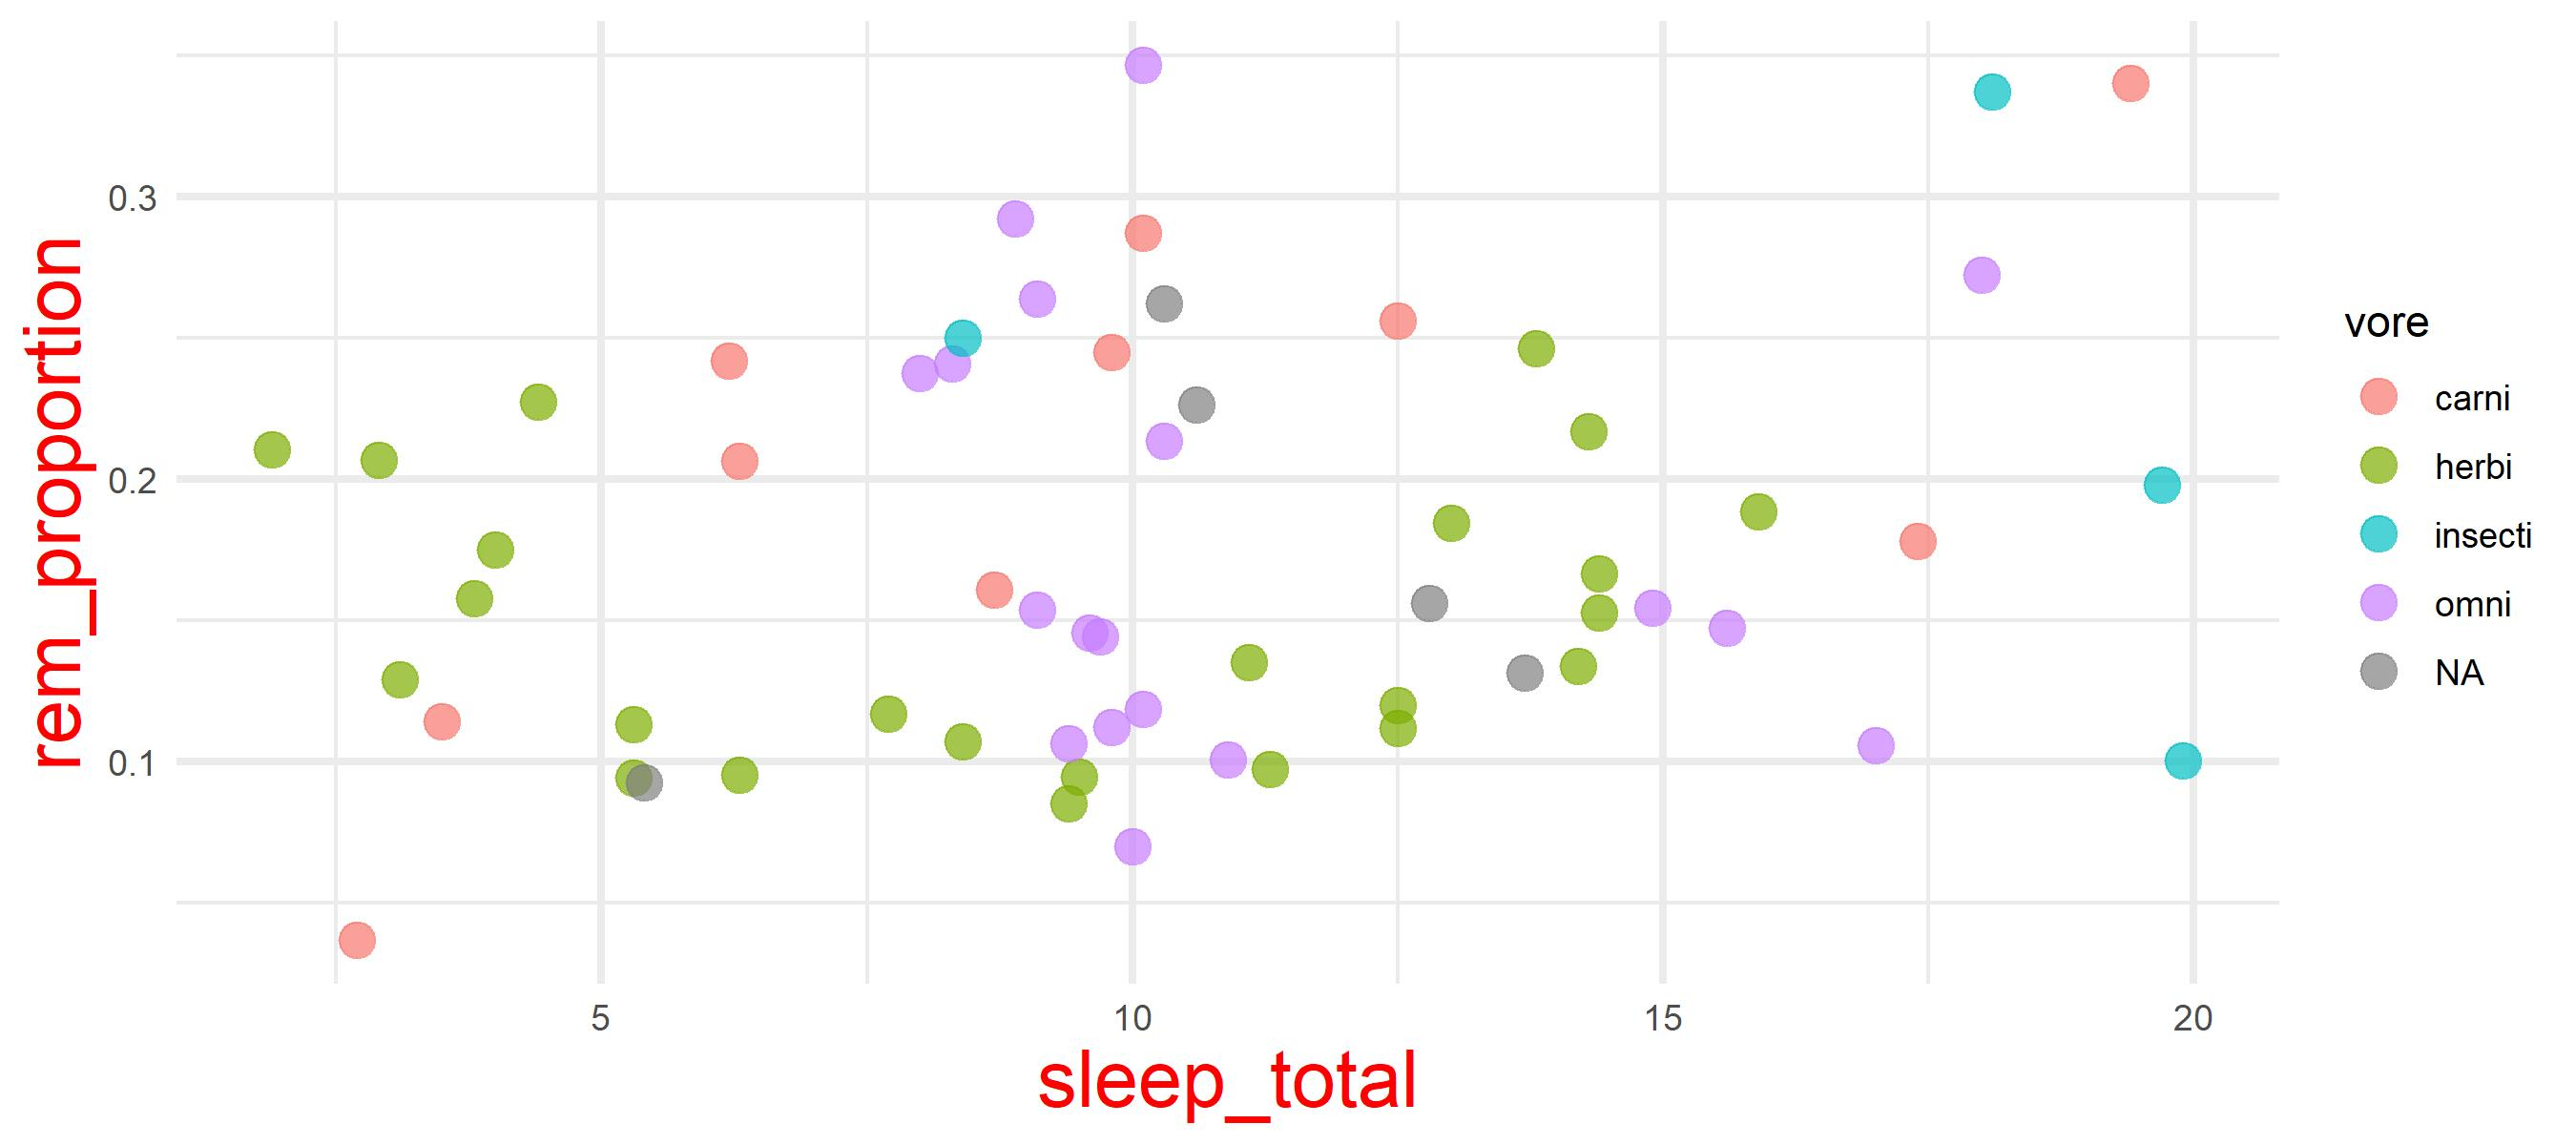

In [34]:
sleepDataExt
    .plot(x="sleep_total", y="rem_proportion", color="vore")
    .geomPoint(size=4.0, alpha=.7)
    .themeMinimal()
    .theme(axisTitle = ElementText(size = 20, color = RColor.red))
    .show()

## Lack of more versatile aestethic mapping


As reported in https://github.com/JetBrains/lets-plot-kotlin/issues/82 only very few aestetics can be mapped to at the moment. E.g. as shown above there is no way to map a data attribute to `size`.

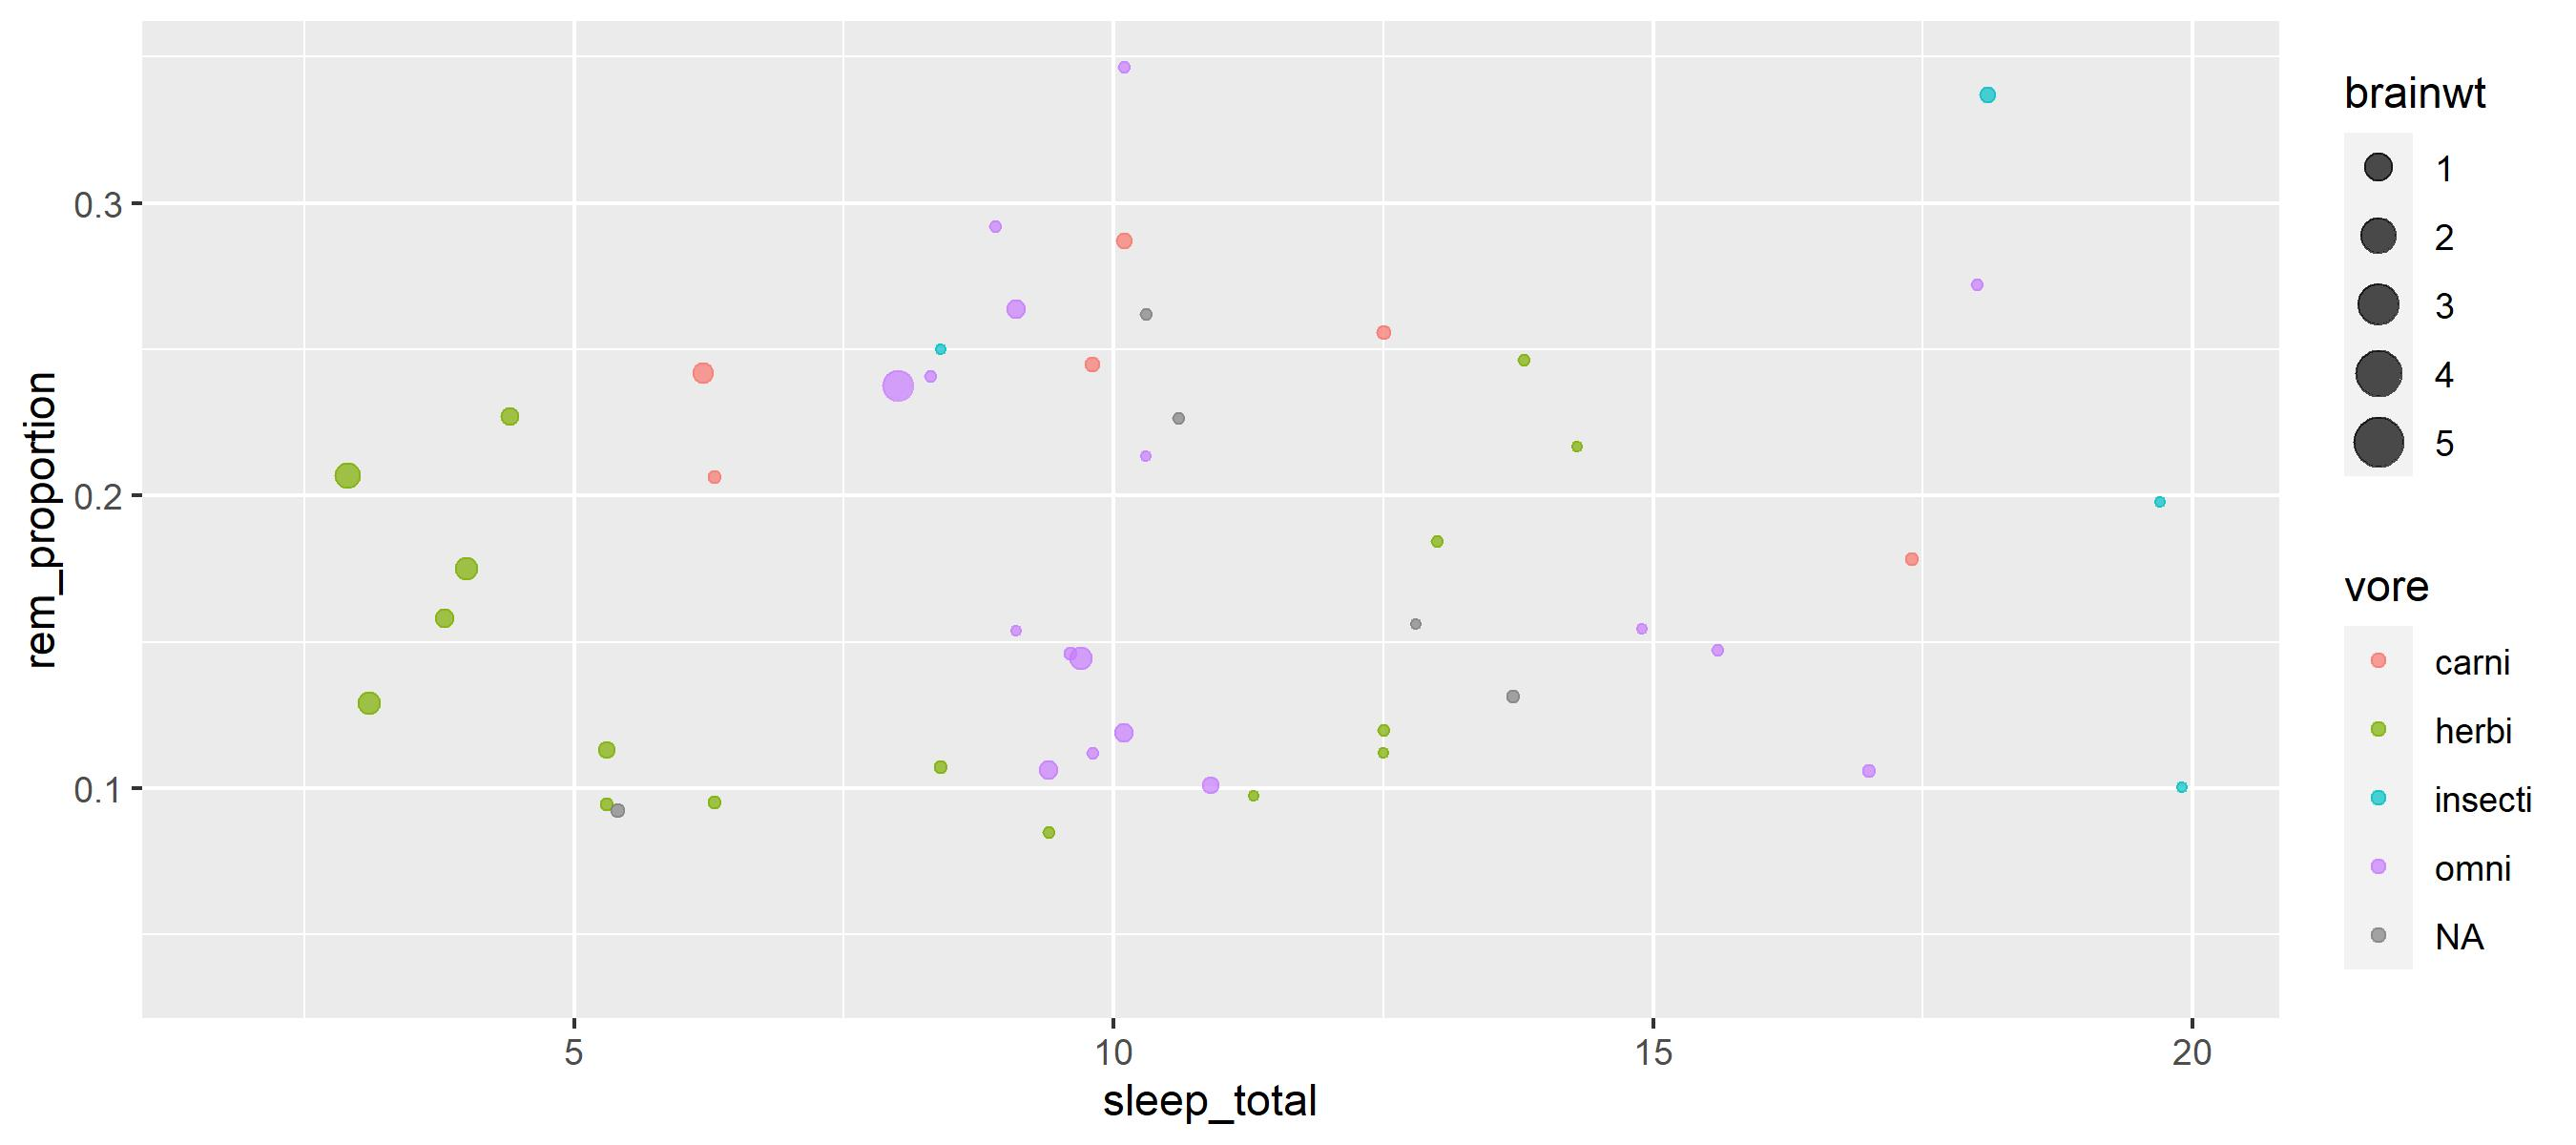

In [35]:
sleepDataExt
    .plot(x="sleep_total", y="rem_proportion", color="vore", size="brainwt")
    .geomPoint(alpha=.7)
    .show()

We find: With this enhanced plot, we can see that _grass-eaters_ with a large brain tend to sleep the least. 


## API Design

It's still unclear why letsplot is not adopting kotlin conventions to chain plot compositoin with a `+` and not the more common `.`, which would also allow to break lines in a more kotlinequse style.

The motiviation from doing so is clear (provide an easier migration from R), but the resulting API (mix of . and +) feels inconsistent.

## Just linear trend in geomSmooth

A nice feature of ggplot are the flexible smoothing backend such as 'loess'. Currently it seems only possible to do linear fits with `letsplot/geomSmooth`.

But also here `kravis` could step in if needed.



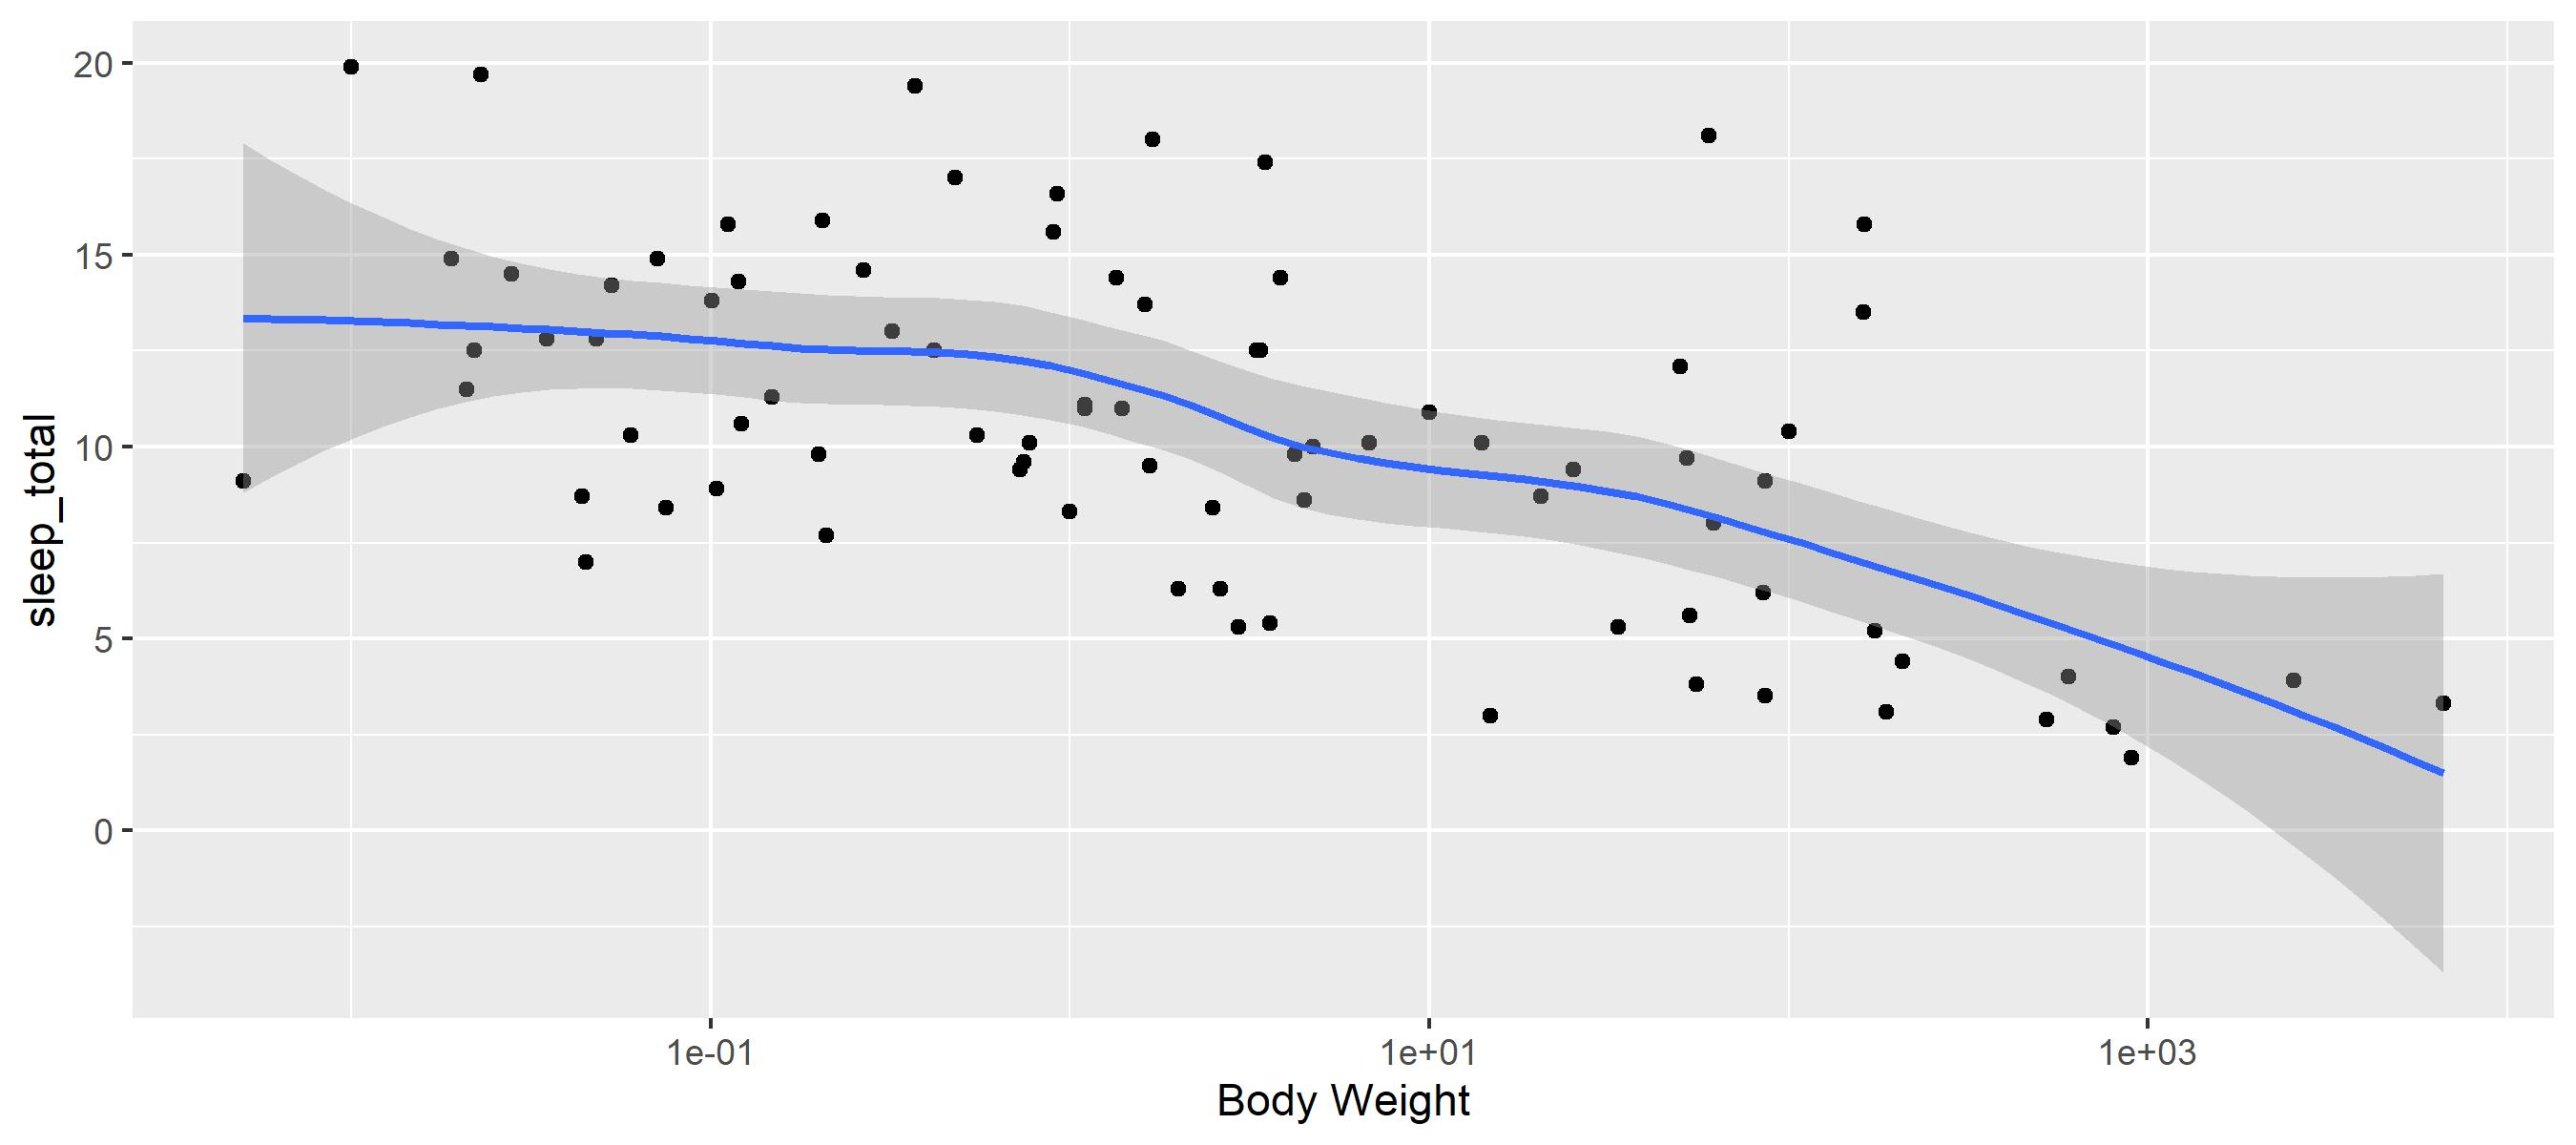

In [37]:
sleepData
    .plot( x="bodywt", y="sleep_total") 
    .xLabel("Body Weight")
    .scaleXLog10()
    .geomPoint()
    .geomSmooth()

# Summary


We've learnt something interesting about biology today. :-)


As we've leared in this tutoral, we can analyze complex data at ease with tools such as `krangl` for data manipulation, and `letsplots` for visualization.

Supported by the functionality of the [kotlin-kernel](https://github.com/Kotlin/kotlin-jupyter) data science becomes more and more fluent and fun in Kotlin.

For question and comments feel welcome get in touch via [kotlin slack](https://app.slack.com/client/T09229ZC6/C4W52CFEZ). 
